In [6]:
import torch
import numpy as np 
from visuals.visuals_util import visualize_pointcloud_eval, visualize_pointcloud_eval_three, visualize_pointcloud, rotate_point_cloud_x, rotate_point_cloud_y

In [5]:
pcs = torch.load('eval-results/surface_reconstruction.pth', map_location=torch.device('cpu'))

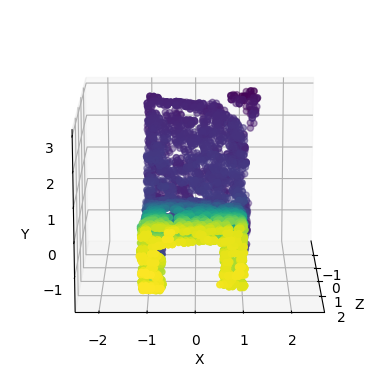

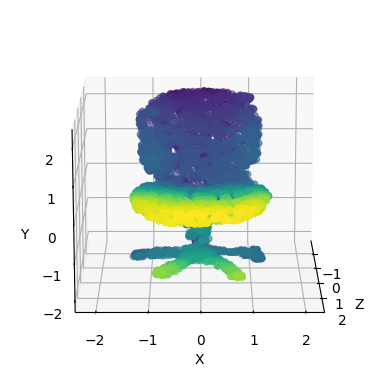

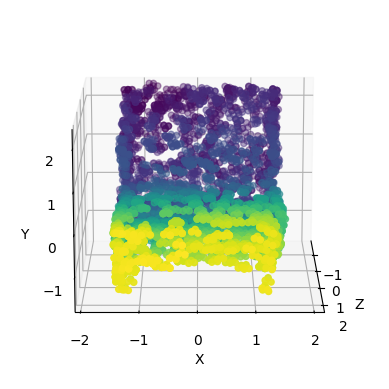

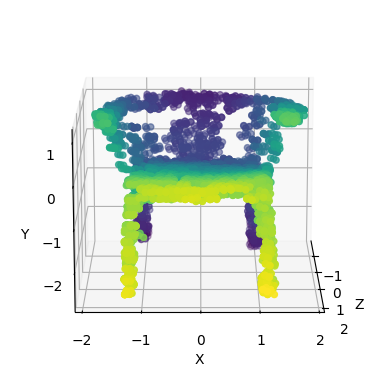

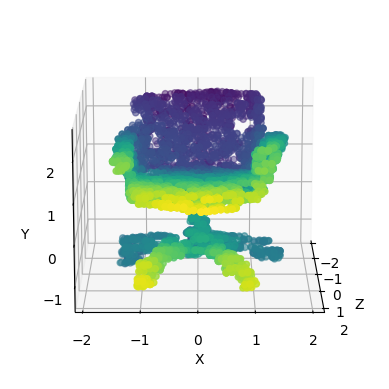

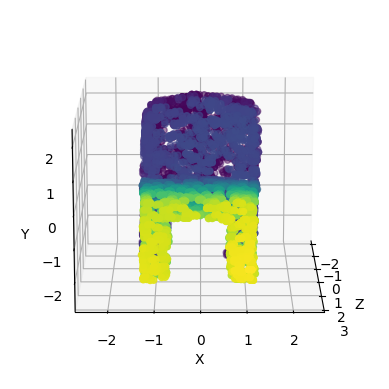

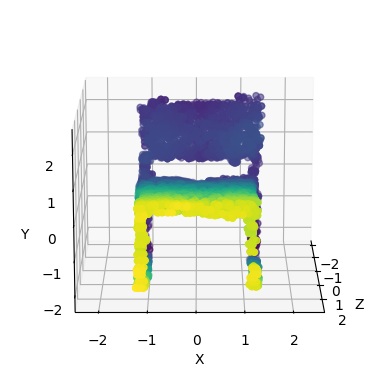

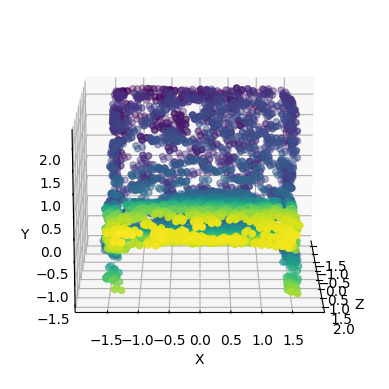

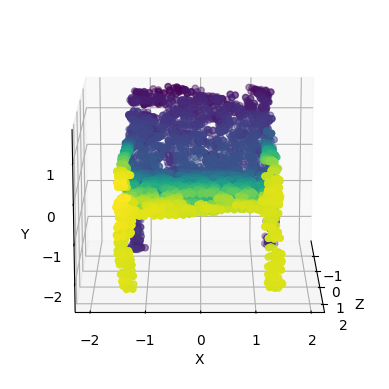

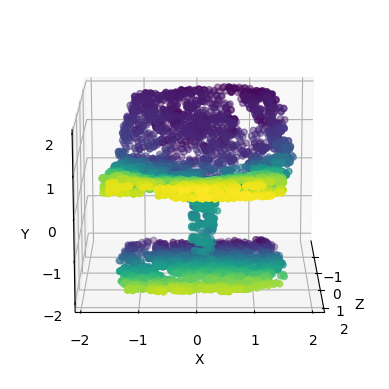

In [9]:
for i in range(10):
    visualize_pointcloud(pcs[i])

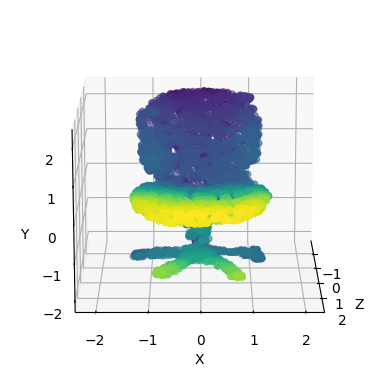

In [12]:
INDEX = 1
_ = visualize_pointcloud(pcs[INDEX])

In [10]:
def export_pointcloud_to_asc(tensor, filename):
    """
    Exports a PyTorch point cloud tensor to an ASC file.
    
    :param tensor: PyTorch tensor representing the point cloud. Shape should be (N, 3) or (N, 6).
    :param filename: Name of the file to save the point cloud to.
    """
    # Ensure the tensor is on CPU and convert to numpy
    numpy_pc = tensor.cpu().numpy()

    # Open file and write points
    with open(filename, 'w') as file:
        for point in numpy_pc:
            line = ' '.join(map(str, point))
            file.write(f"{line}\n")

    print(f"Point cloud exported to {filename}")

In [13]:
export_pointcloud_to_asc(pcs[INDEX], "/Users/stephanschmiedmayer/Desktop/office_chair.asc")

Point cloud exported to /Users/stephanschmiedmayer/Desktop/office_chair.asc


In [2]:
import numpy as np
import open3d as o3d

# Load the point cloud from the file
file_path = '/Users/stephanschmiedmayer/Desktop/office_chair.asc'  # Update this to your file's path
points = np.loadtxt(file_path, delimiter=' ')
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# Poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# Remove low density vertices
densities = np.asarray(densities)
density_threshold = 0.01
vertices_to_remove = densities < density_threshold * np.max(densities)
mesh.remove_vertices_by_mask(vertices_to_remove)

# Visualize the mesh
o3d.visualization.draw_geometries([mesh], window_name="Generated Mesh")


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 